In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , ElasticNet , Lasso , Ridge
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.kernel_ridge import KernelRidge
plt.style.use('fivethirtyeight')
colors=['#ffcd94','#eac086','#ffad60','#ffe39f']
sns.set_palette(sns.color_palette(colors))

In [2]:
#LOADING DATA FILE
df = pd.read_csv("./bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [3]:
#SHAPE OF THE DATASET
df.shape

(252, 15)

In [4]:
#INFO ABOUT OUR ATTRIBUTES AND ITS DATATYPE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [5]:
#ANALYSIS ON THE NUMERICAL COLUMNS
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [6]:
#CHECK FOR NULL VALUES
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [7]:
#CHECK FOR DUPLICATES IN THE DATASET
df.duplicated().sum()

0

Text(0.5, 0.98, 'Visualizing Continuous Columns')

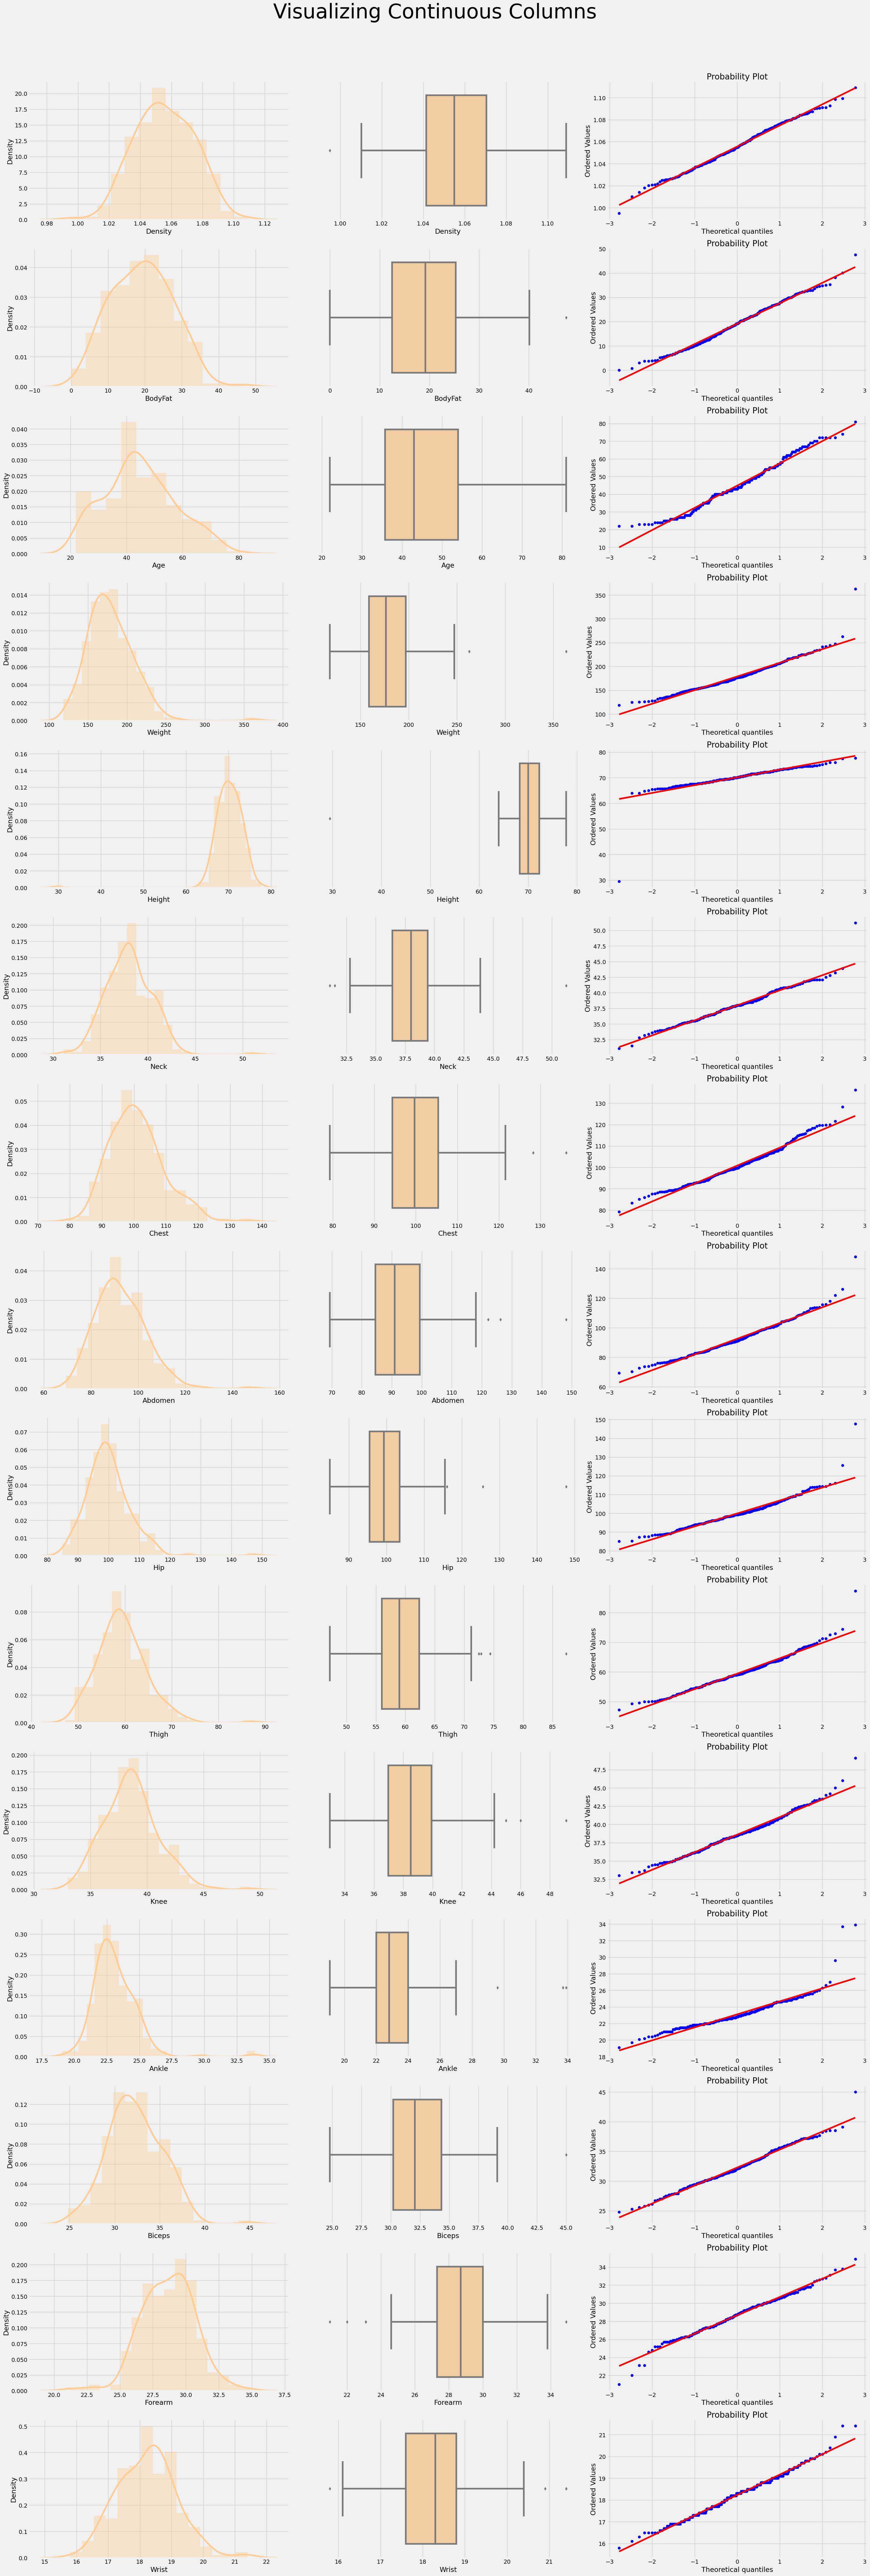

In [8]:
import warnings
import statsmodels.api as sm
import scipy.stats as stats
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(df.columns):
    sns.distplot(df[i],ax=ax[index,0])
    sns.boxplot(df[i],ax=ax[index,1])
    stats.probplot(df[i],plot=ax[index,2])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=50)

In [9]:
print(f'-------Column Skewness------\n{df.skew(axis=0).sort_values()}')

-------Column Skewness------
Height    -5.384987
Forearm   -0.219333
Density   -0.020176
BodyFat    0.146353
Wrist      0.281614
Age        0.283521
Biceps     0.285530
Knee       0.516744
Neck       0.552620
Chest      0.681556
Thigh      0.821210
Abdomen    0.838418
Weight     1.205263
Hip        1.497127
Ankle      2.255134
dtype: float64


<AxesSubplot:>

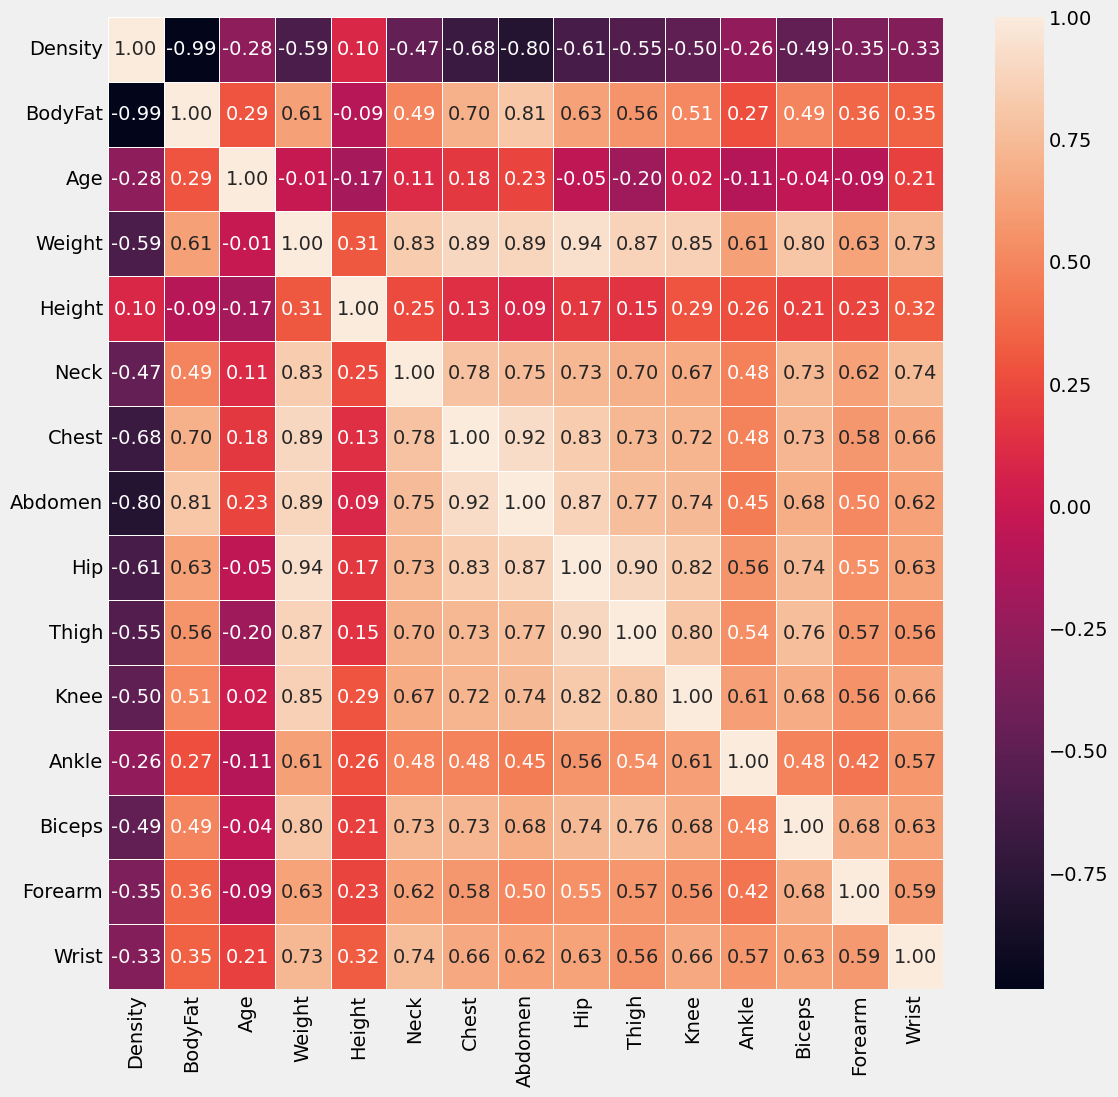

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt="0.2f")

In [11]:
X = df.drop(['BodyFat','Density'],axis=1)
y = df['Density']